In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
nyc_listing = pd.read_csv('listings_nyc.csv')

/Users/catharinewu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nyc_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200408162728,2020-04-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200408162728,2020-04-10,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200408162728,2020-04-11,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.68
3,5099,https://www.airbnb.com/rooms/5099,20200408162728,2020-04-10,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.58
4,5121,https://www.airbnb.com/rooms/5121,20200408162728,2020-04-09,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38


In [4]:
nyc_listing.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## Ethical Issues

In [5]:
nyc_listing[['latitude', 'longitude']].head()

,latitude,longitude
0,40.85722,-73.93790
1,40.75362,-73.98377
2,40.68514,-73.95976
3,40.74767,-73.97500
4,40.68688,-73.95596


In [6]:
nyc_listing['is_location_exact'].value_counts()

t    47689
f     2689
Name: is_location_exact, dtype: int64

Looking at the data, we immediately noticed some privacy issues. For example, 'latitude' and 'longitude' show locations of the listing. Although Airbnb claims that location information for listings are anonymized, some locations are exact, and even not, some buildings can still easily be identified. 

For example, we can identify the buidling for the following listing after searching its location in Google map:

In [7]:
nyc_listing.iloc[4,:]

id                                                                           5121
listing_url                                     https://www.airbnb.com/rooms/5121
scrape_id                                                          20200408162728
last_scraped                                                           2020-04-09
name                                                              BlissArtsSpace!
                                                              ...                
calculated_host_listings_count                                                  1
calculated_host_listings_count_entire_homes                                     0
calculated_host_listings_count_private_rooms                                    1
calculated_host_listings_count_shared_rooms                                     0
reviews_per_month                                                            0.38
Name: 4, Length: 106, dtype: object

![title](google_map_1.png)

Combining locations with other information such as host name, it's not hard to imagine Google will find the rest of the personal information easily. 

Sharing the links to the listings also seems problematic and unnecessary. As these links lead to comprehensive listing info, both host and guest privacy are in risk. These links make reviews a lot more accessible, both reviews for the listing from previous guests and reviews for guest stays from previous hosts. With that, their whereabouts can be identified easily. For example, I noticed one guest was in NYC every two month. This kind of information may help Airbnb advertise, but could be very dangerous for the guest if someone is planning a crime. Also, Airbnb makes these data available in order to show people how it's been used in cities around the world. I don't think including those links would be much of a help in that case. 

We'll perform anonymization according to the discussions above in the later sections. 

## Data cleaning

#### Missing data(NaNs)

First, some columns have no useful information, i.e. contain only NaNs, we'll remove them.

In [8]:
nyc_cleaned = nyc_listing.copy()
nyc_cleaned.isna().sum().sort_values(ascending = False)[:50]

medium_url                     50378
xl_picture_url                 50378
thumbnail_url                  50378
jurisdiction_names             50364
license                        50347
square_feet                    49983
monthly_price                  45745
weekly_price                   45039
notes                          30244
access                         24050
host_response_rate             20691
host_response_time             20691
interaction                    20440
host_about                     20024
house_rules                    19883
neighborhood_overview          17481
transit                        17451
security_deposit               17303
host_acceptance_rate           14331
space                          14179
review_scores_value            11732
review_scores_location         11731
review_scores_checkin          11728
review_scores_accuracy         11715
review_scores_communication    11713
review_scores_cleanliness      11701
review_scores_rating           11681
r

In [9]:
nyc_cleaned = nyc_cleaned.drop(columns = ['medium_url', 'xl_picture_url', 'thumbnail_url'])

Next, we'll examine the columns with a lot fo missing values.

In [10]:
nyc_cleaned['jurisdiction_names'][nyc_cleaned['jurisdiction_names'].notna()]

3472      {"Rensselaer County"," NY"}
16188               {"Georgia State"}
18347           {"Connecticut State"}
23413        {"South Carolina State"}
23649            {"New Jersey State"}
30841           {"Connecticut State"}
36670           {"Connecticut State"}
40730           {"Connecticut State"}
40889           {"Connecticut State"}
42349               {"SAN FRANCISCO"}
42814           {"Connecticut State"}
43483           {"Connecticut State"}
46216           {"Connecticut State"}
49057    {"Westchester County"," NY"}
Name: jurisdiction_names, dtype: object

The jurisdiction_names column has duplicate information with other columns, such as state. So we'll remove it.

In [11]:
nyc_cleaned = nyc_cleaned.drop(columns = ['jurisdiction_names'])

In [12]:
nyc_cleaned['license'][nyc_cleaned['license'].notna()]

25441                   35-2593481
28450                   81-1092926
28451                   81-1092926
28452                   81-1092926
28453                   81-1092926
29059                   35-2593481
29869                   35-2593481
32448                  HUTB-162541
35298                   20-5163086
35345                   20-5163086
35954                   47-3886130
35955                   47-3886130
36329    City registration pending
38471                   83-2444556
38472                   83-2444556
38473                   83-2444556
38694                   11-3461723
38718                   11-3461723
38822                   20-5909724
38826                   20-5909724
38830                   20-5909724
46800                   20-0976501
46801                   20-0976501
46802                   20-0976501
47095                   83-1780849
48158                   20-5163086
50326                   46-0949187
50327                   46-0949187
50328               

Column license contains license info for listing. Adding licenses to their profiles shows that the hosts are serious about renting their places and their listings are more legitimate. This could be potentially useful in the analysis part. We'll convert this to a binary column indicating whether license numbers are included. 

In [13]:
nyc_cleaned['license'][nyc_cleaned['license'].notna()] = 1
nyc_cleaned['license'] = nyc_cleaned['license'].fillna(0)

/Users/catharinewu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The following columns will be coded as binary as well.

- Including 'monthly_price' and 'weekly_price' shows hosts encourge long-term stays. 
- For columns('host_identity_verified', 'host_has_profile_pic', 'host_is_superhost') that are already binary, we'll convert NaNs to 0 as well.

In [14]:
binary_col = ['monthly_price', 'weekly_price',
             'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost']
for col in binary_col:
    nyc_cleaned[col][nyc_cleaned[col].notna()] = 1
    nyc_cleaned[col] = nyc_cleaned[col].fillna(0)

/Users/catharinewu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


We'll drop the square_feet column as there is too much missing information and we can't input it. 

In [15]:
nyc_cleaned = nyc_cleaned.drop(columns = 'square_feet')

In [16]:
nyc_cleaned.isna().sum().sort_values(ascending = False)

notes                     30244
access                    24050
host_response_time        20691
host_response_rate        20691
interaction               20440
                          ...  
maximum_nights                0
minimum_minimum_nights        0
maximum_minimum_nights        0
minimum_maximum_nights        0
id                            0
Length: 101, dtype: int64

In [17]:
nyc_cleaned.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.037800e+04,5.037800e+04,5.037800e+04,50378.000000,50370.000000,50370.000000,50378.000000,50378.000000,50378.000000,50378.000000,...,38650.000000,38665.000000,38647.000000,38646.000000,50378.000000,50378.000000,50378.000000,50378.000000,50378.000000,39674.000000
mean,2.276762e+07,2.020041e+13,8.538360e+07,0.999841,24.761148,24.761148,0.999841,0.999841,40.729343,-73.950986,...,9.731436,9.735187,9.599633,9.382187,0.000615,8.427210,6.552860,1.653718,0.122514,1.184133
std,1.328482e+07,1.224231e+01,9.808916e+07,0.012601,169.322231,169.322231,0.012601,0.012601,0.054753,0.047695,...,0.766756,0.789892,0.762620,0.954890,0.024799,36.377227,35.680731,8.140142,1.249140,1.519787
min,2.060000e+03,2.020041e+13,2.259000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,40.499790,-74.240840,...,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.099576e+07,2.020041e+13,9.477192e+06,1.000000,1.000000,1.000000,1.000000,1.000000,40.689850,-73.983390,...,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.170000
50%,2.227638e+07,2.020041e+13,3.875822e+07,1.000000,1.000000,1.000000,1.000000,1.000000,40.723640,-73.955250,...,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.580000
75%,3.515736e+07,2.020041e+13,1.391451e+08,1.000000,2.000000,2.000000,1.000000,1.000000,40.763020,-73.934130,...,10.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.720000
max,4.313858e+07,2.020041e+13,3.434033e+08,1.000000,2340.000000,2340.000000,1.000000,1.000000,40.912380,-73.712990,...,10.000000,10.000000,10.000000,10.000000,1.000000,307.000000,307.000000,136.000000,34.000000,63.040000


Most of host_neighborhoods are identical to the neighborhoods of their listing, so we'll switch it to a binary column indicating whether the hosts are in the same neighborhoods as their listing. 

In [18]:
nyc_cleaned['host_neighbourhood'] = nyc_cleaned['host_neighbourhood'] == nyc_cleaned['neighbourhood']

#### Columns that are too general that don't convey any useful information

The following columns only contain 1 value throughout the dataset, thus we'll remove them. 

In [19]:
gen_col = []
for col in nyc_cleaned.columns:
    num = len(nyc_cleaned[col].value_counts())
    if num <= 1:
        gen_col.append(col)
        print(col)
        print(nyc_cleaned[col].value_counts())

scrape_id
20200408162728    50378
Name: scrape_id, dtype: int64
experiences_offered
none    50378
Name: experiences_offered, dtype: int64
country_code
US    50378
Name: country_code, dtype: int64
country
United States    50378
Name: country, dtype: int64
has_availability
t    50378
Name: has_availability, dtype: int64
requires_license
f    50378
Name: requires_license, dtype: int64
is_business_travel_ready
f    50378
Name: is_business_travel_ready, dtype: int64


In [20]:
nyc_cleaned = nyc_cleaned.drop(columns = gen_col)

## Anonymization

Since we can more about group analysis, instead of indivisual records, we'll remove the unique identifiers. 

In [21]:
nyc_anonymized = nyc_cleaned.copy()

In [22]:
unique_col = ['id', 'listing_url']
nyc_anonymized = nyc_anonymized.drop(columns = unique_col)

In [23]:
nyc_anonymized['is_location_exact'].value_counts()

t    47689
f     2689
Name: is_location_exact, dtype: int64

As discussed in the Ethics section, including exact locations violates privacy, and since we'll anonymize the exact locations anyway, we'll remove this column.

In [24]:
nyc_anonymized = nyc_anonymized.drop(columns = 'is_location_exact')

The following columns contain too much information about listings/hosts/guests, the urls lead directly to the listing/profile page, similar with some descriptions if search on Google,  these could lead to dangerous situation if being abused. 

All the useful information contained in urls are already in our dataset, so we'll remove those columns.

In [25]:
url_col = ['picture_url', 'host_url', 'host_picture_url', 'host_thumbnail_url']
nyc_anonymized = nyc_anonymized.drop(columns = url_col)

For columns with (unique) descriptions, such as 'name' and 'description', we'll only take their lengths into account. We believe the lengths of these descriptions are correlated with the qualities of the listings, as hosts who provide detailed descriptions are likely to care about them more. Similarly, for 'amenities' and 'host_verifications', the more the merrir. So we'll include their length as well. 

In [26]:
descr_col = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit',
             'access', 'interaction', 'house_rules', 'host_about', 'notes', 'amenities',
             'host_verifications']
for col in descr_col:
    nyc_anonymized[col] = nyc_anonymized[col].str.len()
    nyc_anonymized[col] = nyc_anonymized[col].fillna(0)

As of exact locations(latitude, longitude), we'll add some random noise.

In [27]:
noise = np.random.normal(0, 1, size = len(nyc_anonymized)) #standard normal

nyc_anonymized['latitude'] = nyc_anonymized['latitude'] + noise
nyc_anonymized['longitude'] = nyc_anonymized['longitude'] + noise

## Analysis

#### Pre-processing 

In [28]:
nyc_anonymized[['street', 'neighbourhood', 'neighbourhood_cleansed', 
                'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
                'market', 'smart_location', 'latitude', 'longitude']].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude
0,"New York, NY, United States",Washington Heights,Washington Heights,Manhattan,New York,NY,10040,New York,"New York, NY",41.339196,-73.455924
1,"New York, NY, United States",Manhattan,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",41.976527,-72.760863
2,"Brooklyn, NY, United States",Clinton Hill,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",39.984408,-74.660492
3,"New York, NY, United States",Midtown East,Murray Hill,Manhattan,New York,NY,10016,New York,"New York, NY",40.635076,-74.087594
4,"Brooklyn, NY, United States",Brooklyn,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,New York,"Brooklyn, NY",41.702045,-72.940795


Some location columns contain only duplicated information with other coluns, we'll only keep 'neighbourhood_cleansed', and the anonymized 'latitute' 'longitude', and remove the rest.

In [29]:
nyc_df = nyc_anonymized.copy()

In [30]:
loc_col = ['street', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'city', 'state', 'zipcode', 'market', 'smart_location', 'host_location']
nyc_df = nyc_df.drop(columns = loc_col)

Since we already have host_id, we don't need their names.

In [31]:
nyc_df = nyc_df.drop(columns = 'host_name')

Convert date columns to integers using the time interval between dates and date scraped.

In [32]:
date_col = ['host_since', 'first_review', 'last_review']
day_now = pd.to_datetime(nyc_df['last_scraped'])
for col in date_col:
    day_then = pd.to_datetime(nyc_df[col])
    nyc_df[col] = (day_now - day_then).dt.days

Remove scrapping date info as we've incorporated them into other columns.

In [33]:
nyc_df = nyc_df.drop(columns = ['last_scraped', 'calendar_last_scraped'])

In [34]:
def convert_days(s):
    if s == 'today':
        num = 0
    elif s == 'yesterday':
        num = 1
    elif s.endswith('days ago'):
        num = int(s.replace('days ago', ''))
    elif s.endswith('weeks ago'):
        num = int(s.replace('weeks ago', ''))*7
    elif s.endswith('months ago'):
        num = int(s.replace('months ago', '')) * 30
    else:
        num = 0
    return num

In [35]:
nyc_df.calendar_updated = nyc_df.calendar_updated.apply(convert_days)

Now we'll deal with text and categorical columns.

In [36]:
for col in nyc_df.columns:
    if nyc_df[col].dtype not in ['float64', 'int64', 'datetime64[ns]']:
        print(col + ': ', len(nyc_df[col].value_counts()))

host_response_time:  4
host_response_rate:  67
host_acceptance_rate:  99
host_neighbourhood:  2
neighbourhood_cleansed:  223
property_type:  40
room_type:  4
bed_type:  5
price:  665
security_deposit:  217
cleaning_fee:  218
extra_people:  103
instant_bookable:  2
cancellation_policy:  6
require_guest_profile_picture:  2
require_guest_phone_verification:  2


Convert numbers that are in string format to floats.

In [37]:
num_rate_col = ['host_response_rate', 'host_acceptance_rate']
num_fee_col = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [38]:
for col in num_rate_col:
    nyc_df[col] = nyc_df[col].fillna('0')
    nyc_df[col] = nyc_df[col].str.rstrip('%').astype(float)/100

In [39]:
for col in num_fee_col:
    nyc_df[col] = nyc_df[col].fillna('0')
    nyc_df[col] = nyc_df[col].str.strip('$,.').str.replace(',','').astype(float)

Binary columns will be converted to 0(False) and 1(True).

In [40]:
nyc_df['host_neighbourhood'] = nyc_df['host_neighbourhood'].astype(int)

In [41]:
bin_col = ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
for col in bin_col:
    nyc_df[col] = nyc_df[col].map({'f': 0, 't': 1})

Convert ordinal columns into integers.

In [42]:
# quickest replies have the highest ranking, we'll assume NaNs represent not replying at all
response_dict = {'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4}
nyc_df['host_response_time'] = nyc_df['host_response_time'].map(response_dict)
nyc_df['host_response_time'] = nyc_df['host_response_time'].fillna(0)

In [43]:
nyc_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    22729
flexible                       15771
moderate                       11704
super_strict_60                   92
strict                            62
super_strict_30                   20
Name: cancellation_policy, dtype: int64

In [44]:
# higher rankings are given to the more flexible 
cancel_dict = {'flexible': 6,
               'moderate': 5,
               'strict_14_with_grace_period': 4, 
               'strict': 3,
               'super_strict_60': 2,
               'super_strict_30': 1}
nyc_df['cancellation_policy'] = nyc_df['cancellation_policy'].map(cancel_dict)
nyc_df['cancellation_policy'] = nyc_df['cancellation_policy'].fillna(0)

In [45]:
nyc_df['host_response_time'].value_counts()

0.0    20691
4.0    18512
3.0     6082
2.0     4077
1.0     1016
Name: host_response_time, dtype: int64

One-hot encode nominal columns.

In [46]:
print('Number of columns before one-hot encoding: ', nyc_df.shape[1])

Number of columns before one-hot encoding:  75


In [47]:
nominal_col = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']
for col in nominal_col:
    if nyc_df[col].isna().sum() != 0:
        drop_first = False
    else:
        drop_first = True
    nyc_df = pd.concat([nyc_df,pd.get_dummies(nyc_df[col], drop_first = drop_first, dtype = float)],axis=1)

In [48]:
nyc_df.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,Treehouse,Villa,Yurt,Hotel room,Private room,Shared room,Couch,Futon,Pull-out Sofa,Real Bed
0,10.0,0.0,427.0,427.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,205.0,1000.0,1000.0,217.0,0.0,502.0,103.0,762.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,31.0,440.0,1000.0,1000.0,108.0,0.0,1000.0,596.0,217.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41.0,460.0,1000.0,1000.0,896.0,274.0,1000.0,29.0,140.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,15.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Correlation

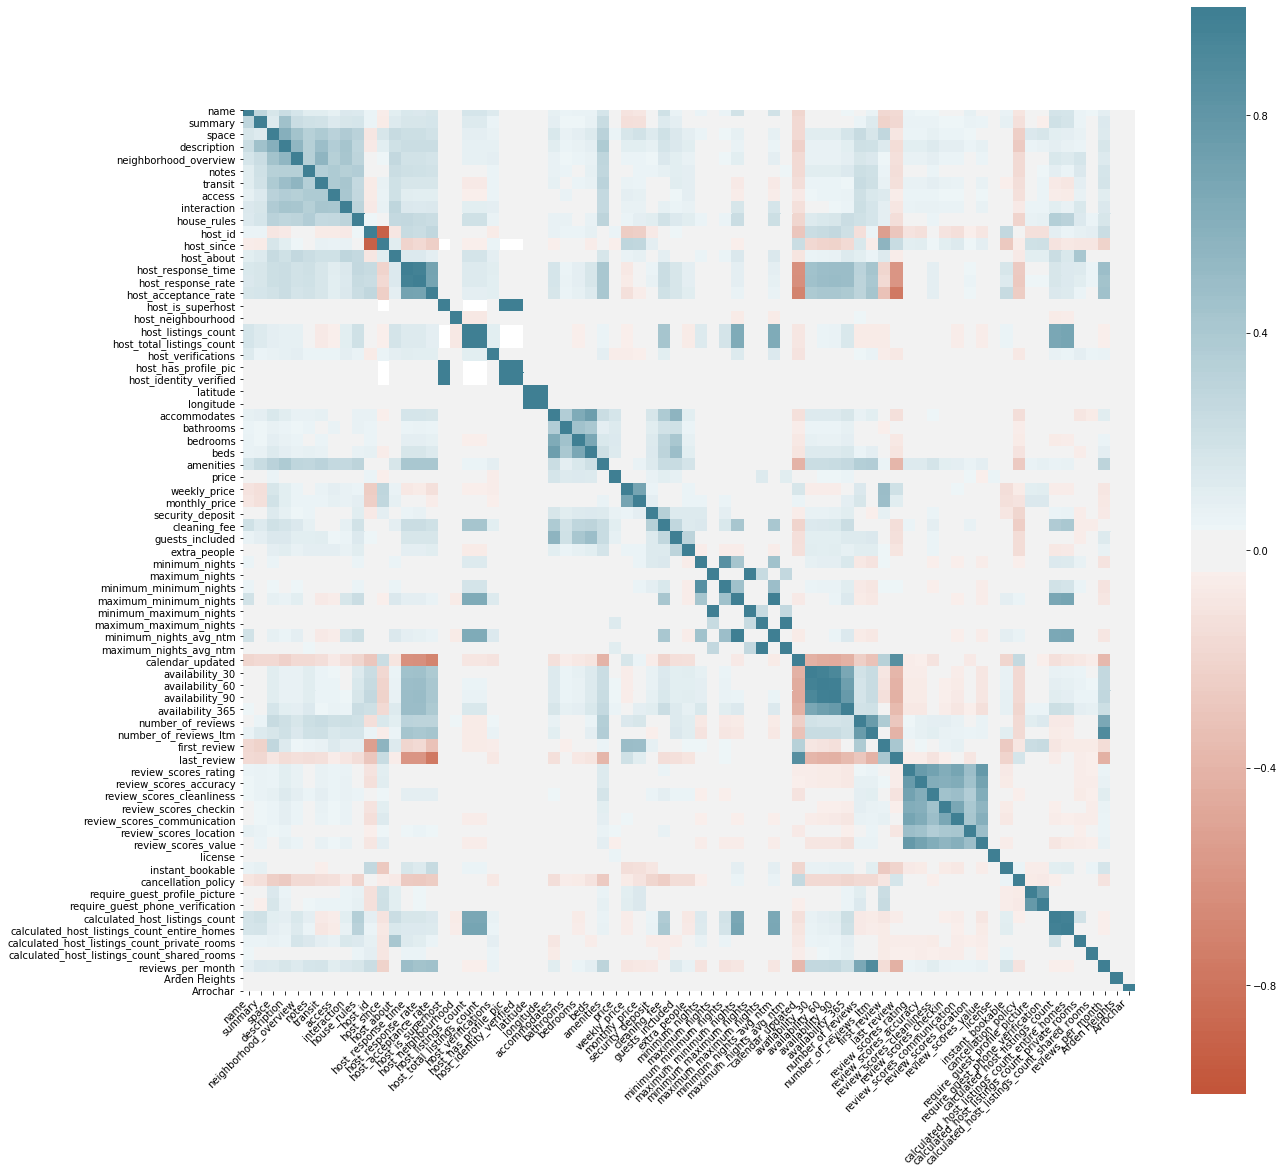

In [49]:
corr = nyc_df.iloc[:, :77].corr()
plt.figure(figsize = (20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [50]:
avoid_repeat = []
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j and j not in avoid_repeat and corr.iloc[i,j] >= 0.8:
            avoid_repeat.append(i)
            print('{} and {} are correlated: {}'.format(corr.index[i], corr.columns[j], corr.iloc[i,j]))

host_response_time and host_response_rate are correlated: 0.9605275824977534
host_is_superhost and host_has_profile_pic are correlated: 1.0
host_is_superhost and host_identity_verified are correlated: 1.0
host_listings_count and host_total_listings_count are correlated: 1.0
host_has_profile_pic and host_identity_verified are correlated: 1.0
latitude and longitude are correlated: 0.9975990634275234
minimum_nights and minimum_minimum_nights are correlated: 0.8559174392667559
maximum_nights and minimum_maximum_nights are correlated: 0.9999999996792905
maximum_minimum_nights and minimum_nights_avg_ntm are correlated: 0.9950220127273937
maximum_maximum_nights and maximum_nights_avg_ntm are correlated: 0.9906456996761888
calendar_updated and last_review are correlated: 0.8650794282522112
availability_30 and availability_60 are correlated: 0.9632475355486428
availability_30 and availability_90 are correlated: 0.9185339366555747
availability_60 and availability_90 are correlated: 0.98062471487

Most of the highly correlated columns aren't suprising, such as host_listings_count and host_total_listings_count. But it's interesting to see that superhosts all have profile pictures and have their identities verified. Also hosts who have profile pictures and also have their identities verified. It's also intersting to see availability_30 and availability_90 are less correlated than availability_30 and availability_60.

To avoid colinearity during modeling, we'll remove some of these columns. 

In [51]:
corr_col = ['host_has_profile_pic', 'host_identity_verified', 'host_total_listings_count',
            'minimum_minimum_nights', 'minimum_maximum_nights', 'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes']

In [52]:
nyc_df = nyc_df.drop(columns = corr_col)

#### Modeling

First, we'll predict a listing's quality/popularity using its review scores.

In [70]:
# prepare the data
X, y = nyc_df.drop(columns = 'review_scores_value'), nyc_df['review_scores_value']
y.value_counts()

10.0    21591
9.0     13072
8.0      2758
6.0       458
7.0       454
2.0       136
4.0       111
5.0        61
3.0         5
Name: review_scores_value, dtype: int64

Say a good listing has a review score of 10, anything less than 10 count as not so good. The dataset is relatively balanced.

In [71]:
y = (y == 10).astype(int)

In [72]:
print('Proportion of good reviews: ', y.value_counts()[0]/len(y))
print('Proportion of not so good reviews: ', y.value_counts()[1]/len(y))

Proportion of good reviews:  0.5714200643137878
Proportion of not so good reviews:  0.4285799356862122


In [73]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
rf = RandomForestClassifier().fit(X_train, y_train)

/Users/catharinewu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Bedford-Stuyvesant'